In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
# could be e2e_counts.tsv or local_counts.tsv
viral_counts=pd.read_csv("e2e_counts.tsv",sep="\t",index_col=["accession"]) 

In [4]:
viral_counts

,description,QM100,QM101,QM102,QM103,QM104,QM105,QM106,QM107,QM108,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
accession,,,,,,,,,,,,,,,,,,,,,
AC_000001.1,"Ovine adenovirus A, complete genome",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AC_000002.1,"Bovine adenovirus B, complete genome",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
AC_000003.1,"Canine adenovirus 1, complete genome",0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AC_000004.1,"Duck adenovirus A, complete genome",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
AC_000005.1,"Human mastadenovirus A, complete genome",0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC_055918.1,"Mycobacterium phage OhShagHennessy, complete g...",1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_055919.1,"Klebsiella phage vB KpnP P184, complete genome",0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,1,2,0,0
NC_055920.1,"Gordonia phage Phlop, complete genome",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sv40=viral_counts.loc[["NC_001669.1"]]

In [6]:
sv40

,description,QM100,QM101,QM102,QM103,QM104,QM105,QM106,QM107,QM108,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
accession,,,,,,,,,,,,,,,,,,,,,
NC_001669.1,Simian virus 40 complete genome,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
sv40=sv40.drop(["description"],axis='columns').T

In [8]:
threshold=32

In [9]:
sv40_pos=sv40[sv40['NC_001669.1']>=threshold].index.array

In [10]:
sv40_pos

<PandasArray>
['QM116', 'QM117', 'QM152', 'QM173', 'QM287', 'QM289', 'QM298', 'QM299',
 'QM308', 'QM311', 'QM331', 'QM335', 'QM336', 'QM337', 'QM361', 'QM365',
 'QM366', 'QM368', 'QM370', 'QM378', 'QM381', 'QM384', 'QM390', 'QM395',
 'QM396', 'QM397',  'QM39', 'QM401', 'QM403', 'QM405', 'QM406',  'QM40',
 'QM410', 'QM411',  'QM42',  'QM46',  'QM72']
Length: 37, dtype: object

# note that this is different from the list provided

In [11]:
sv40_neg=sv40[sv40['NC_001669.1']<threshold].index.array

In [12]:
sv40_neg

<PandasArray>
['QM100', 'QM101', 'QM102', 'QM103', 'QM104', 'QM105', 'QM106', 'QM107',
 'QM108', 'QM109',
 ...
  'QM90',  'QM91',  'QM92',  'QM93',  'QM94',  'QM95',  'QM96',  'QM98',
  'QM99',   'QM9']
Length: 265, dtype: object

In [13]:
# could be QM.TP53.GAPDH.exon.tsv or QM.TP53.GAPDH.transcript.tsv
feature_counts=pd.read_csv("QM.TP53.GAPDH.exon.tsv",sep="\t",header=1,index_col=["Geneid"]) 

In [14]:
feature_counts

,Chr,Start,End,Strand,Length,QM100,QM101,QM102,QM103,QM104,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
Geneid,,,,,,,,,,,,,,,,,,,,,
GAPDH,chr12;chr12;chr12;chr12;chr12;chr12;chr12;chr1...,6534512;6534517;6534532;6534533;6534534;653454...,6534569;6534569;6534569;6534569;6534661;653456...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,2396,277682,200142,299528,220381,411470,...,383645,406218,410588,409558,207181,345564,338121,316419,374597,233815
TP53,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,7661779;7665416;7666086;7666902;7668402;766840...,7662014;7665531;7666244;7667425;7669690;766969...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,5676,9696,7933,14250,7923,7321,...,10545,10462,7799,8402,8315,8296,8559,3105,7211,8059


# note that neither of these are normalized

In [15]:
feature_counts.drop(["Chr","Start","End","Strand","Length"],axis='columns',inplace=True)

In [16]:
feature_counts

,QM100,QM101,QM102,QM103,QM104,QM105,QM106,QM107,QM108,QM109,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
Geneid,,,,,,,,,,,,,,,,,,,,,
GAPDH,277682,200142,299528,220381,411470,252836,376088,297193,441518,404080,...,383645,406218,410588,409558,207181,345564,338121,316419,374597,233815
TP53,9696,7933,14250,7923,7321,5155,10188,5428,6190,7654,...,10545,10462,7799,8402,8315,8296,8559,3105,7211,8059


In [17]:
sv40_neg_feature_counts=feature_counts[sv40_neg]

In [18]:
sv40_neg_feature_counts

,QM100,QM101,QM102,QM103,QM104,QM105,QM106,QM107,QM108,QM109,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
Geneid,,,,,,,,,,,,,,,,,,,,,
GAPDH,277682,200142,299528,220381,411470,252836,376088,297193,441518,404080,...,383645,406218,410588,409558,207181,345564,338121,316419,374597,233815
TP53,9696,7933,14250,7923,7321,5155,10188,5428,6190,7654,...,10545,10462,7799,8402,8315,8296,8559,3105,7211,8059


In [19]:
sv40_pos_feature_counts=feature_counts[sv40_pos]

In [20]:
sv40_pos_feature_counts

,QM116,QM117,QM152,QM173,QM287,QM289,QM298,QM299,QM308,QM311,...,QM401,QM403,QM405,QM406,QM40,QM410,QM411,QM42,QM46,QM72
Geneid,,,,,,,,,,,,,,,,,,,,,
GAPDH,396265,300894,336959,394723,374712,493442,659630,800548,191010,278400,...,315565,737399,436814,369438,299221,464336,671547,251840,320744,551437
TP53,4039,4936,9053,10084,7407,9715,9602,6391,3379,4929,...,8309,9550,10793,7718,16141,3680,7349,14173,9472,7174


In [21]:
from scipy.stats import ttest_ind

In [22]:
sv40_pos_feature_counts.loc['GAPDH'].values

array([396265, 300894, 336959, 394723, 374712, 493442, 659630, 800548,
       191010, 278400, 239668, 338678, 397288, 144342, 378353, 390073,
       383160, 266888, 503355, 472447, 346169, 309911, 381092, 300569,
       316446, 430411, 769987, 315565, 737399, 436814, 369438, 299221,
       464336, 671547, 251840, 320744, 551437])

In [23]:
sv40_neg_feature_counts.loc['GAPDH'].values

array([ 277682,  200142,  299528,  220381,  411470,  252836,  376088,
        297193,  441518,  404080,  208090,  660659,  306645,  365937,
        205186,  338757,  267665,  201953,  402510,  472023,  326079,
        471678,  727236,  346579,  594129,  335956,  203231,  346671,
        205914,  277066,  681291,  292373,  530430,  233760,  284048,
        736850,  225875,  500425,  534194,  299761,  222925,  558514,
        544694,  505711,  378633,  436614,  369450,  327099,  462713,
        356426,  316469,  464988,  666998,  325004, 1019528,  366806,
        890218,  613042,  359030,  351019,  292417,  306373,  422965,
        295174,  605267,  516543,  313129,   91815,  331509,  346684,
        507620,  367387,  264156,  713324,  359587,  364362,  293924,
        839584,  234022,  413602,  548547,  773987,  345212,  445832,
        386866,  430284,  430532,  310472,  347115,  423118,  590083,
        189084,  328795,  137595,  381876,  580864,  400757,  904507,
        650626,  515

In [24]:
t_stat, p_value = ttest_ind(
    sv40_pos_feature_counts.loc['GAPDH'].values, 
    sv40_neg_feature_counts.loc['GAPDH'].values)

In [25]:
t_stat, p_value

(1.179750384355204, 0.23903417852648795)

<AxesSubplot: >

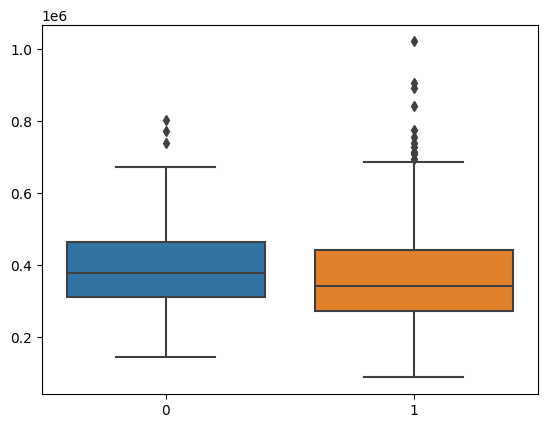

In [26]:
sns.boxplot(data=[sv40_pos_feature_counts.loc['GAPDH'].values, 
    sv40_neg_feature_counts.loc['GAPDH'].values])

In [27]:
t_stat, p_value = ttest_ind(
    sv40_pos_feature_counts.loc['TP53'].values, 
    sv40_neg_feature_counts.loc['TP53'].values)

In [28]:
t_stat, p_value

(-0.8728508185007419, 0.38344247978598134)

<AxesSubplot: >

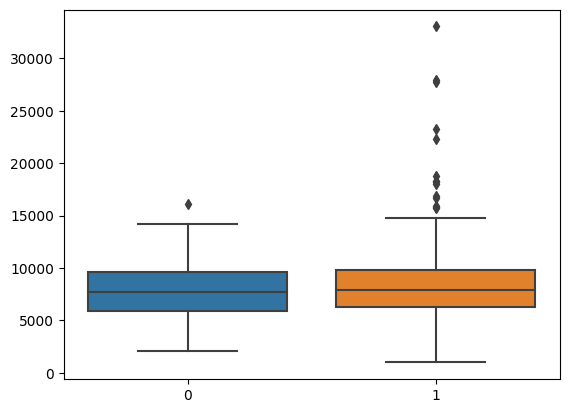

In [29]:
sns.boxplot(data=[sv40_pos_feature_counts.loc['TP53'].values, 
    sv40_neg_feature_counts.loc['TP53'].values])

In [30]:
sv40_pos_div=sv40_pos_feature_counts.loc['TP53'].values / sv40_pos_feature_counts.loc['GAPDH'].values

In [31]:
sv40_pos_div

array([0.01019267, 0.01640445, 0.02686677, 0.02554703, 0.01976718,
       0.01968823, 0.01455665, 0.00798328, 0.01769017, 0.01770474,
       0.02374535, 0.01938124, 0.01948209, 0.01464577, 0.01869154,
       0.01511256, 0.02045621, 0.0233731 , 0.01783234, 0.01866241,
       0.0302049 , 0.01354905, 0.03219433, 0.01904388, 0.02441175,
       0.02620519, 0.01837044, 0.02633055, 0.01295093, 0.02470846,
       0.02089119, 0.05394341, 0.0079253 , 0.01094339, 0.0562778 ,
       0.02953134, 0.01300965])

In [32]:
sv40_neg_div=sv40_neg_feature_counts.loc['TP53'].values / sv40_neg_feature_counts.loc['GAPDH'].values

In [33]:
sv40_neg_div

array([0.03491764, 0.03963686, 0.04757485, 0.03595138, 0.01779231,
       0.02038871, 0.0270894 , 0.01826423, 0.01401981, 0.01894179,
       0.04046807, 0.01771564, 0.01313245, 0.01825451, 0.04122114,
       0.02201873, 0.02674986, 0.02713007, 0.02161685, 0.01262862,
       0.02542022, 0.0118195 , 0.01667272, 0.02080045, 0.01639375,
       0.03613271, 0.01745305, 0.02013148, 0.03259613, 0.01609364,
       0.01391182, 0.03374457, 0.01222782, 0.03366701, 0.03430054,
       0.01020696, 0.03520531, 0.02620573, 0.01853259, 0.02878293,
       0.03572502, 0.01752329, 0.01352686, 0.01133058, 0.02135841,
       0.02464877, 0.02289078, 0.03197197, 0.03182534, 0.02133683,
       0.02229918, 0.01311647, 0.01422943, 0.0173444 , 0.0120595 ,
       0.0190673 , 0.00736449, 0.0086552 , 0.01277331, 0.0236369 ,
       0.05412818, 0.00933829, 0.02131855, 0.02364707, 0.04613832,
       0.05369543, 0.05818049, 0.07284213, 0.01968272, 0.02464781,
       0.0122572 , 0.01939644, 0.03650116, 0.01785444, 0.02299

In [34]:
t_stat, p_value = ttest_ind(
    sv40_pos_div,
    sv40_neg_div)

In [35]:
t_stat, p_value

(-1.9258832432188822, 0.05506379721182048)

<AxesSubplot: >

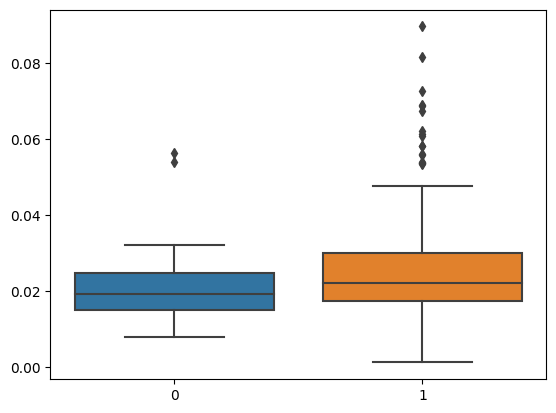

In [36]:
sns.boxplot(data=[sv40_pos_div,
    sv40_neg_div])

3- Plot SV40 hits to tp53 expression in SV40+ subjects.

In [37]:
sv40_pos_feature_counts

,QM116,QM117,QM152,QM173,QM287,QM289,QM298,QM299,QM308,QM311,...,QM401,QM403,QM405,QM406,QM40,QM410,QM411,QM42,QM46,QM72
Geneid,,,,,,,,,,,,,,,,,,,,,
GAPDH,396265,300894,336959,394723,374712,493442,659630,800548,191010,278400,...,315565,737399,436814,369438,299221,464336,671547,251840,320744,551437
TP53,4039,4936,9053,10084,7407,9715,9602,6391,3379,4929,...,8309,9550,10793,7718,16141,3680,7349,14173,9472,7174


In [38]:
sv40.T

,QM100,QM101,QM102,QM103,QM104,QM105,QM106,QM107,QM108,QM109,...,QM90,QM91,QM92,QM93,QM94,QM95,QM96,QM98,QM99,QM9
accession,,,,,,,,,,,,,,,,,,,,,
NC_001669.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
sv40_pos_feature_counts_plus=pd.concat([sv40_pos_feature_counts,sv40.T],join="inner")

In [40]:
sv40_pos_feature_counts_plus

,QM116,QM117,QM152,QM173,QM287,QM289,QM298,QM299,QM308,QM311,...,QM401,QM403,QM405,QM406,QM40,QM410,QM411,QM42,QM46,QM72
GAPDH,396265,300894,336959,394723,374712,493442,659630,800548,191010,278400,...,315565,737399,436814,369438,299221,464336,671547,251840,320744,551437
TP53,4039,4936,9053,10084,7407,9715,9602,6391,3379,4929,...,8309,9550,10793,7718,16141,3680,7349,14173,9472,7174
NC_001669.1,64,128,32,1257,1328,1669,35414,53628,59111,34,...,88,52,101,227,902,6703,524,1730,81,178


<AxesSubplot: xlabel='NC_001669.1', ylabel='TP53'>

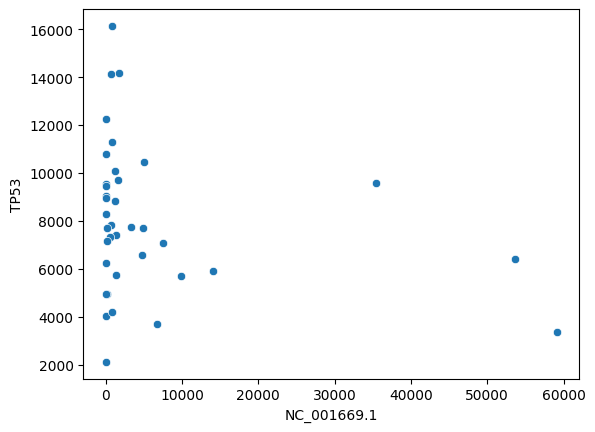

In [41]:
sns.scatterplot(data=sv40_pos_feature_counts_plus.T, x="NC_001669.1", y="TP53")